# Plotting functions to visualize features in 2D
To plot features:
```
fig = scatter_features(data,name1,name2,classes,**kwargs)
```
data = pandas data frame with the features as columns

name1 = name of feature to plot on x axis, must be the name of a column in data

name2 = name of feature to plot on y axis, must be the name of a column in data

classes = classification of each data point, i.e. (0,1), this sets the color of the data points

\**kwargs = arguments to pass to matplotlib scatter function, ex. cmap, s, marker, ...


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
plt.style.use('bmh')

%matplotlib inline

In [26]:
def __scatter_features(feature1,feature2,classification,name1,name2,ax=None,**kwargs):
    if ax == None:
        fig,ax = plt.subplots()
    else:
        ax = ax
        fig = plt.gcf()
    scat = ax.scatter(feature1,feature2,c=classification,**kwargs)
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.title(name2+' vs. '+name1)
    cbar = fig.colorbar(scat, ticks=list(set(classification)))
    return fig

def scatter_features(data,name1,name2,classes,ax=None,**kwargs):
    fig = __scatter_features(data[name1],
                             data[name2],
                             data[classes],
                             name1,
                             name2,
                             ax=ax,
                             **kwargs)
    return fig

def plot_all_feautres(data,classification,**kwargs):
    print 'WARNING: THIS WILL TAKE A LONG TIME FOR MANY FEATURES'
    #go = raw_input('Continue: [Y/n]')
    #if go != 'Y':
    #    print 'Quitting'
    #    return 'I quit'
    
    y = data[classification]
    x = data.drop(classification,axis=1)
    
    all_combinations = itertools.combinations(x.columns,2)
    
    n_subplots = len(list(all_combinations))
    print 'N', n_subplots
    x_size,y_size =  len(x.columns)-1,n_subplots/len(x.columns)+1
    print 'x',x_size
    print 'y',y_size
    fig, axarr = plt.subplots(x_size, y_size)
    fig.set_size_inches(x_size*4,y_size*4)
    
    all_combinations = itertools.combinations(x.columns,2)
    combo = next(all_combinations)
    i,j = 0,0
    while True:
        axarr[i,j].scatter(data[combo[0]],data[combo[1]],c=y,**kwargs)
        axarr[i,j].set_xlabel(combo[0])
        axarr[i,j].set_ylabel(combo[1])
        #plt.title(combo[0]+' vs. '+combo[1])
        try:
            combo = next(all_combinations)
        except StopIteration:
            break
        j += 1
        if j >= y_size:
            j = 0
            i+= 1
    return fig

# Testing these functions to see if they work

In [8]:
import pandas as pd

In [9]:
train_raw = pd.read_csv('data_sets/train.csv')

In [10]:
def preprocess(data):
    gender_map = {'male':1,'female':0}
    embarked_map = {'C':0,'Q':1,'S':2}
    data['Sex'] = data['Sex'].map(gender_map)
    data['Embarked'] = data['Embarked'].map(embarked_map)
    data.fillna(-1,inplace=True)
    return data

In [11]:
train = preprocess(train_raw)

In [12]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [13]:
ignore = ['Name','Ticket','Cabin']
train_x = train.drop(ignore,axis=1)

/Users/mayen/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


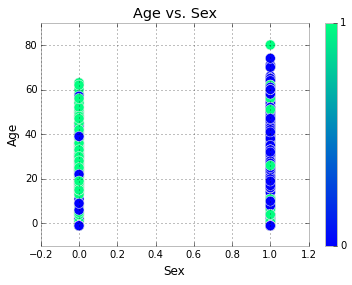

In [14]:
fig = __scatter_features(train['Sex'],train['Age'],train['Survived'],'Sex','Age',cmap='winter',s=100)
plt.show()

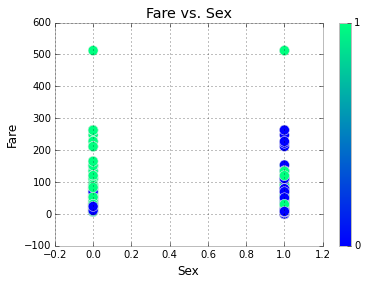

In [15]:
fig = __scatter_features(train['Sex'],train['Fare'],train['Survived'],'Sex','Fare',cmap='winter',s=100)


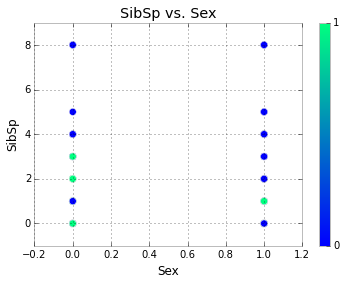

In [16]:
fig = scatter_features(train,'Sex','SibSp','Survived',cmap='winter',s=50)

N 28
x 7
y 4
Figure(2240x1280)


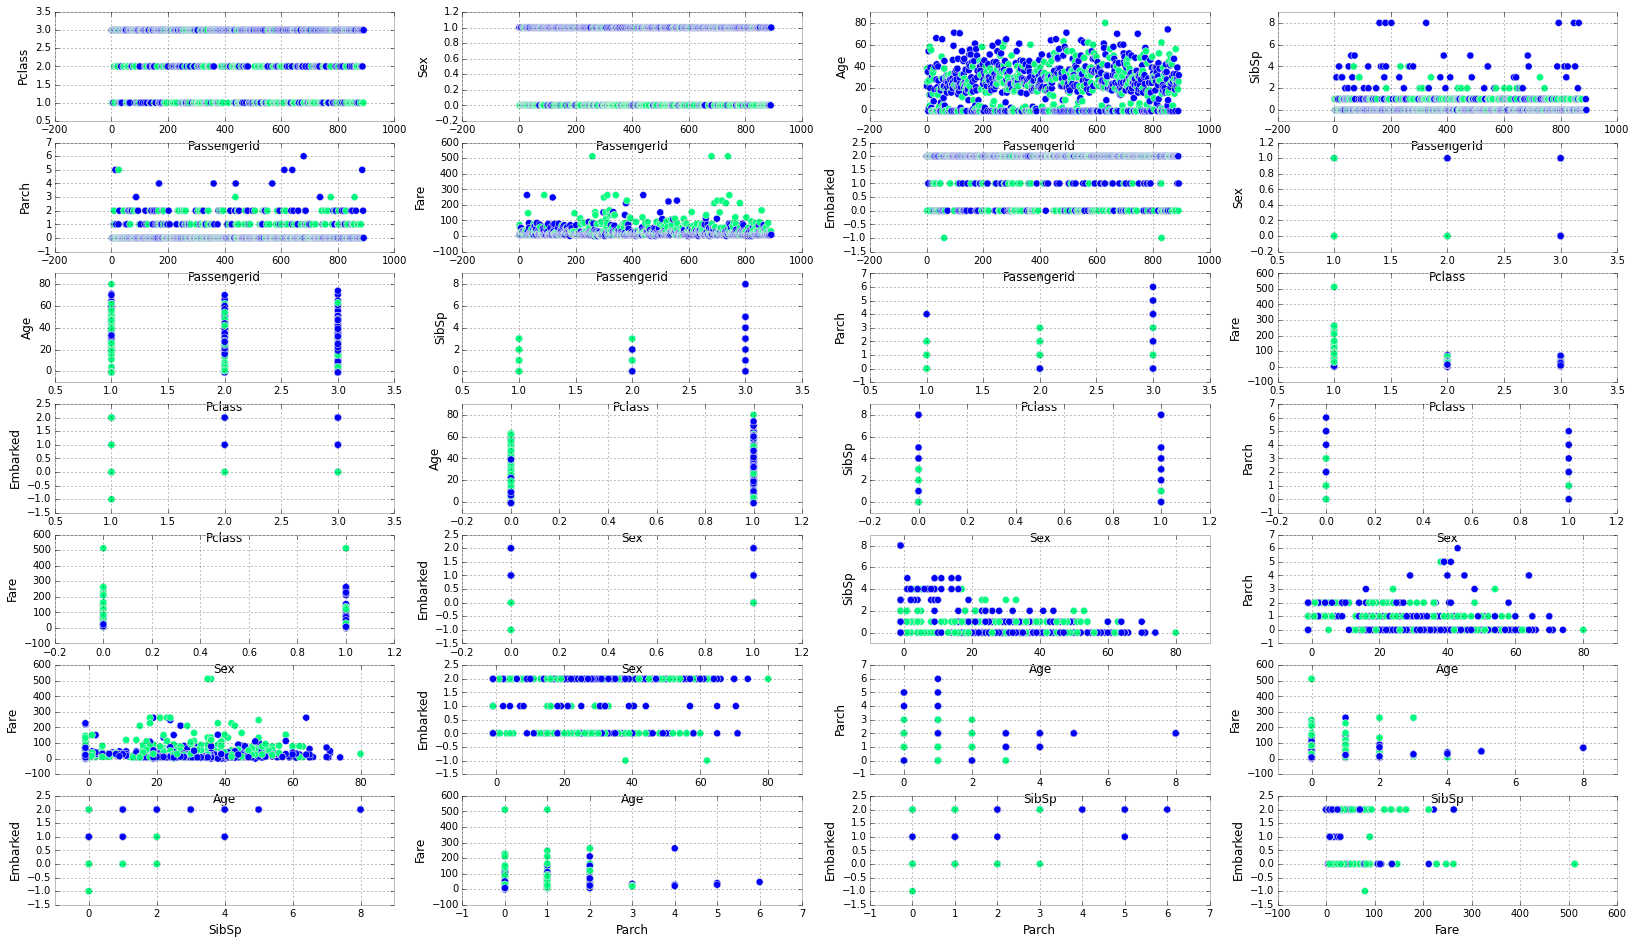

In [27]:
figs = plot_all_feautres(train_x,'Survived',cmap='winter',s=50)
print figs

In [20]:
print len(train_x.columns)

9


In [75]:
a = g(3)
next(a)
next(a)
next(a)

2

In [76]:
next(a)

StopIteration: 